## Import packages

In [2]:
from cartopy import config
import cartopy
import cartopy.crs as ccrs
import cmocean
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

## Wind speed

In [3]:
lat = -31.0
lon = 153.25

In [4]:
mhw = xr.open_dataarray('/g/data/e14/cp3790/Charuni/Tasmania/aus-ocean-sev-2.nc').sel(latitude=lat, longitude=lon)
thw = xr.open_dataarray('/g/data/e14/cp3790/Charuni/Tasmania/aus-coastal-sev.nc').sel(latitude=lat, longitude=lon)

In [5]:
## wind speed

ds = xr.open_dataset('/g/data/e14/cp3790/Charuni/Heatwaves/windspeed_anom.nc')
windspeed_anom = ds.windspeed_anomaly 

In [6]:
composite = windspeed_anom.where((thw>1) & (mhw>1), drop=True)

In [7]:
ds_u = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ERA5-WIND/u10/era5_dailyu10_*.nc').sel(latitude=slice(0, -60), longitude=slice(90, 180), time=slice('1982', '2018'))
uwind = ds_u.u10

In [8]:
ds_v = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ERA5-WIND/v10/era5_dailyv10_*.nc').sel(latitude=slice(0, -60), longitude=slice(90, 180), time=slice('1982', '2018'))
vwind = ds_v.v10

In [9]:
ulon = uwind.coords['longitude']
vlon = vwind.coords['longitude']

In [10]:
x = ulon.values
y = uwind.coords['latitude'].values
u = uwind.data
v = vwind.data

TypeError: quiver() missing 2 required positional arguments: 'u' and 'v'

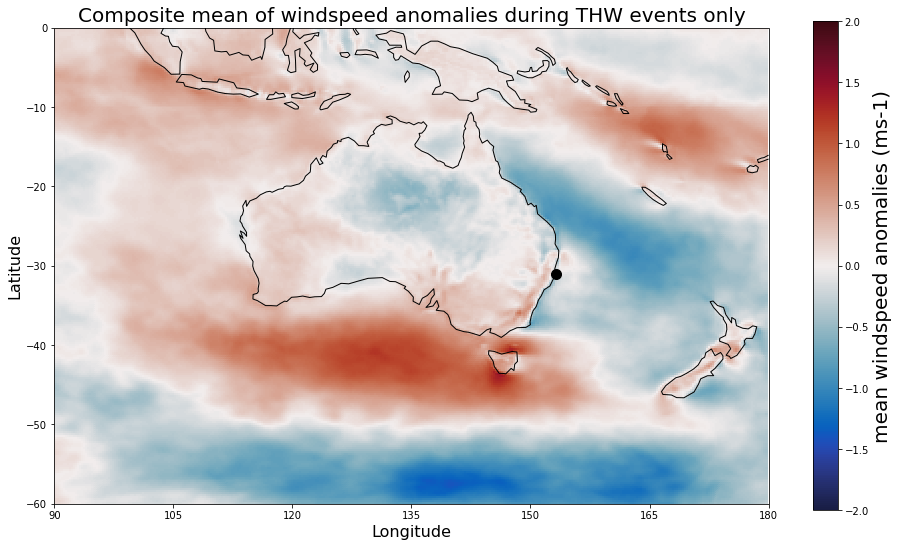

In [11]:
fig, ax = plt.subplots(figsize=(16,9))    
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_xticks([90, 105, 120, 135, 150, 165, 180], crs=ccrs.PlateCarree())
ax.set_yticks([-60, -50, -40, -30, -20, -10, 0], crs=ccrs.PlateCarree())

ploteo=composite.mean(dim='time').plot(
            #cmap=plt.cm.get_cmap('bwr', 20), # Specify the colourmap of interest and also the number of discrete levels. I have 5, corresponding to the number of MHW severity categories. See https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html for examples
            cmap=cmocean.cm.balance,
            vmin=-2.0, vmax=2.0, # Minimum and maximum values of the colormap
       )

ploteo.colorbar.ax.set_ylabel('mean windspeed anomalies (ms-1)',fontsize=20)
ax.coastlines()
ax.set_extent([90, 180, -60, 0],crs=ccrs.PlateCarree())
plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.title('Composite mean of windspeed anomalies during THW events only', fontsize=20)
plt.plot(153.25, -31.0,  markersize=10, marker='o', color='black')
plt.quiver(y,u)
plt.show()